# Linear Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linear_regression_train.csv to linear_regression_train.csv


In [ ]:
import pandas as pd
file = pd.read_csv('linear_regression_train.csv')
print(file.shape)

(48000, 27)


In [ ]:
n_sets,n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 25)
(48000,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2)


In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
_,n=x_train.shape
b_init=0
w_init=np.zeros((n,))

In [ ]:
def cost(x,y,w,b):
  m,_=x.shape
  J=0.
  J=np.sum((np.dot(x,w)+b-y)**2)
  return J/(2*m)

In [ ]:
def compute_gradient(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros((n,))
  dj_db=0.
  dj_dw=np.dot(x.T,(np.dot(x,w)+b-y))
  dj_db=np.sum(np.dot(x,w)+b-y)
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db


In [ ]:
def gradient_descent(x,y,w_init,b_init,alpha,n_iterations,batch_size):
  J_history=[]
  w=w_init.copy()
  b=b_init
  m,n=x.shape
  i=0
  for i in range (n_iterations):
    for batch_start in range(0, m, batch_size):
        batch_end = batch_start + batch_size
        x_batch = x[batch_start:batch_end]
        y_batch = y[batch_start:batch_end]
        dj_dw,dj_db=compute_gradient(x_batch,y_batch,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
    J_history.append(cost(x,y,w,b))
    if(i%math.ceil(n_iterations/10)==0):

      print(f"Iteration {i:4d}: Cost: {J_history[-1]:8.2f} ")
  return w,b,J_history


In [ ]:
def compute_mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [ ]:
def r2_score(y_true, y_pred):
        y_mean = sum(y_true) / len(y_true)
        total_variance = sum((y_true - y_mean) ** 2 )
        explained_variance = sum((y_true - y_pred) ** 2 )
        return 1 - (explained_variance / total_variance)

In [ ]:
def compute_precision(y_true, y_pred, tolerance):
    true_positives = np.sum(np.abs(y_true - y_pred) <= tolerance)
    predicted_positives = len(y_pred)
    precision = true_positives / predicted_positives
    return precision

Iteration    0: Cost: 2396112.40 
Iteration  100: Cost: 585291.99 
Iteration  200: Cost: 290333.44 
Iteration  300: Cost: 179237.52 
Iteration  400: Cost: 133195.00 
Iteration  500: Cost: 113205.10 
Iteration  600: Cost: 104180.78 
Iteration  700: Cost: 99941.55 
Iteration  800: Cost: 97862.43 
Iteration  900: Cost: 96793.60 



b,w found by gradient descent: 0.43,[ 12.15   6.06  12.29  18.28  -1.92  47.02  11.92  -9.61  15.33   7.18
  -0.22  -0.5   23.79  58.4    1.96  26.23   0.39  13.51  29.75  43.48
   1.91  -0.37 -24.82  12.09   0.15] 
Final cost: 99398.07234436442



Mean squared error: 198796.14468872885

R square error: 0.9567493324714379

Accuracy: 92.90625

Precision: 0.9290625





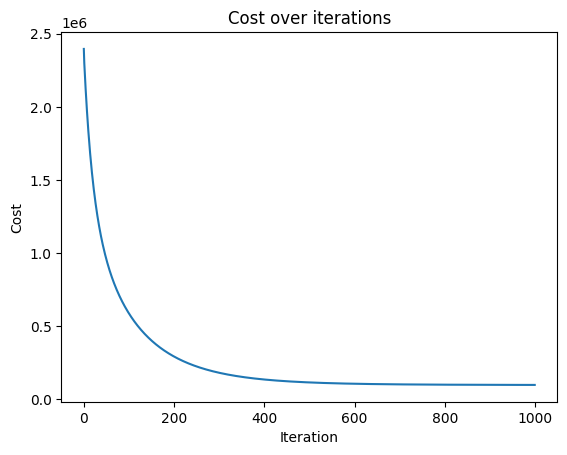

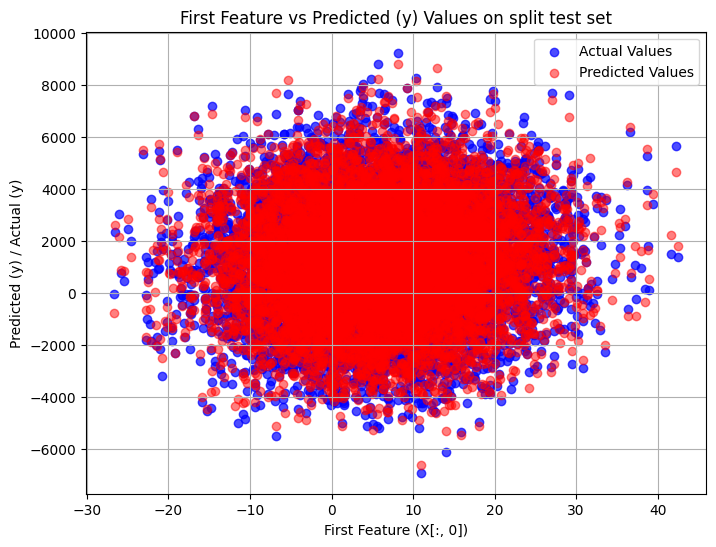

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
n_iter=1000
alpha=5.0e-8
range_y = np.max(y_test) - np.min(y_test)
tolerance=0.05*range_y
w_final,b_final,J_hist=gradient_descent(X_train,y_train,w_init,b_init,alpha,n_iter,100)
print(f"\n\n\nb,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"Final cost: {cost(X_test,y_test,w_final,b_final)}")
y_pred=np.dot(X_test,w_final)+b_final
mse=compute_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
accuracy=np.mean(np.abs(y_pred - y_test)<=tolerance)*100
precision=compute_precision(y_test,y_pred,tolerance)
print(f"\n\n\nMean squared error: {mse}")
print(f"\nR square error: {r2}")
print(f"\nAccuracy: {accuracy}")
print(f"\nPrecision: {precision}\n\n\n")
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()

#Plotting predicted vs target value with respect to first feature
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(X_test[:, 0], y_pred, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted (y) / Actual (y)")
plt.title("First Feature vs Predicted (y) Values on split test set")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linear_regression_test.csv to linear_regression_test.csv


In [ ]:
import pandas as pd
file = pd.read_csv('linear_regression_test.csv')
print(file.shape)

(12000, 26)


In [ ]:
n_sets,n_features=file.shape
x_test=file.iloc[:,1:n_features]
x_test=x_test.values
print(x_train.shape)

(48000, 25)


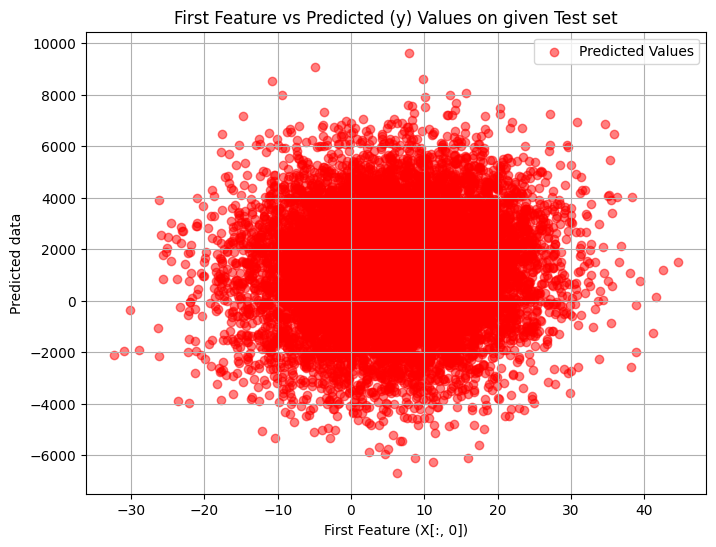

In [ ]:
y_pred_test=np.dot(x_test,w_final)+b_final
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], y_pred_test, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted data")
plt.title("First Feature vs Predicted (y) Values on given Test set")
plt.legend()
plt.grid(True)
plt.show()